In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
cities

['rikitea',
 'saint-joseph',
 'saint george',
 'mataura',
 'sentyabrskiy',
 'cape town',
 'byron bay',
 'punta arenas',
 'attawapiskat',
 'puerto ayora',
 'busselton',
 'vaini',
 'pacific grove',
 'longyearbyen',
 'pathardi',
 'biu',
 'albany',
 'hilo',
 'aklavik',
 'bluff',
 'paradwip',
 'port alfred',
 'saint-philippe',
 'araouane',
 'ribeira grande',
 'bethel',
 'hobart',
 'chokurdakh',
 'fortuna',
 'codo',
 'qobustan',
 'thompson',
 'yaan',
 'kaitangata',
 'vaitupu',
 'huarmey',
 'ushuaia',
 'olafsvik',
 'awjilah',
 'hermanus',
 'kapaa',
 'yanam',
 'husyatyn',
 'talnakh',
 'mar del plata',
 'geraldton',
 'provideniya',
 'berlevag',
 'mys shmidta',
 'jamestown',
 'yerofey pavlovich',
 'vyatskiye polyany',
 'henties bay',
 'barentsburg',
 'sao sebastiao',
 'shingu',
 'khatanga',
 'barra do bugres',
 'ohangaron',
 'lerwick',
 'chuy',
 'tasiilaq',
 'santiago de cuba',
 'palmer',
 'avarua',
 'port elizabeth',
 'taolanaro',
 'barrow',
 'souillac',
 'victoria',
 'springfield',
 'port blai

In [4]:
# Setup url configuration
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
params = {
    "appid": weather_api_key,
    "units": units,
}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# Create lists to hold data
lon =  []
lat = []
hum = []
maxtemp = []
wind = []
clouds = []
date = []
country = []
city_name = []

# Print opening statement
print("Initiating Data Retrieval")
print("-----------------------------")

# Set up initial values for record and set counts
record_count = 1
set_count = 1

# Loop through the list of cities and request data for each
for city in cities:
    try:
        params["q"]= city
        response = requests.get(url, params=params).json()
        print(f"Processing Record {record_count} of Set {set_count}: {city.title()}")
        lon.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        hum.append(response["main"]["humidity"])
        maxtemp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
    except:
        print("City not found. Skipping...")
    
    record_count += 1
    if record_count == 51:
        record_count = 1
        set_count += 1
    
# Print closing
print("-----------------------------")
print("Data Retrieval Complete!")
print("-----------------------------")

Initiating Data Retrieval
-----------------------------
Processing Record 1 of Set 1: Rikitea
Processing Record 2 of Set 1: Saint-Joseph
Processing Record 3 of Set 1: Saint George
Processing Record 4 of Set 1: Mataura
Processing Record 5 of Set 1: Sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1: Cape Town
Processing Record 7 of Set 1: Byron Bay
Processing Record 8 of Set 1: Punta Arenas
Processing Record 9 of Set 1: Attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1: Puerto Ayora
Processing Record 11 of Set 1: Busselton
Processing Record 12 of Set 1: Vaini
Processing Record 13 of Set 1: Pacific Grove
Processing Record 14 of Set 1: Longyearbyen
Processing Record 15 of Set 1: Pathardi
Processing Record 16 of Set 1: Biu
Processing Record 17 of Set 1: Albany
Processing Record 18 of Set 1: Hilo
Processing Record 19 of Set 1: Aklavik
Processing Record 20 of Set 1: Bluff
Processing Record 21 of Set 1: Paradwip
City not found. Skipping...
Processing Re

Processing Record 41 of Set 4: Linqiong
Processing Record 42 of Set 4: Muros
Processing Record 43 of Set 4: Mae Hong Son
Processing Record 44 of Set 4: Winslow
Processing Record 45 of Set 4: Goma
Processing Record 46 of Set 4: Batagay-Alyta
Processing Record 47 of Set 4: Katsuura
Processing Record 48 of Set 4: Lebu
Processing Record 49 of Set 4: Huilong
Processing Record 50 of Set 4: Iquique
Processing Record 1 of Set 5: Curuguaty
Processing Record 2 of Set 5: Yakima
Processing Record 3 of Set 5: Mahdalynivka
Processing Record 4 of Set 5: Saint-Francois
Processing Record 5 of Set 5: Mareeba
Processing Record 6 of Set 5: Tagusao
Processing Record 7 of Set 5: Ilulissat
Processing Record 8 of Set 5: Tubod
Processing Record 9 of Set 5: Mitsamiouli
Processing Record 10 of Set 5: Aktanysh
Processing Record 11 of Set 5: Haukipudas
Processing Record 12 of Set 5: Polson
Processing Record 13 of Set 5: Husavik
Processing Record 14 of Set 5: Tiksi
Processing Record 15 of Set 5: Port Hardy
Processi

Processing Record 32 of Set 8: Tilichiki
Processing Record 33 of Set 8: Taltal
Processing Record 34 of Set 8: Gwembe
Processing Record 35 of Set 8: Severodvinsk
Processing Record 36 of Set 8: Belushya Guba
City not found. Skipping...
Processing Record 37 of Set 8: Puerto Escondido
Processing Record 38 of Set 8: Powell River
Processing Record 39 of Set 8: Quatre Cocos
Processing Record 40 of Set 8: Portland
Processing Record 41 of Set 8: Padang
Processing Record 42 of Set 8: Leh
Processing Record 43 of Set 8: Tiarei
Processing Record 44 of Set 8: Soyo
Processing Record 45 of Set 8: Esperance
Processing Record 46 of Set 8: Tungkang
City not found. Skipping...
Processing Record 47 of Set 8: Pangnirtung
Processing Record 48 of Set 8: Rawson
Processing Record 49 of Set 8: Korhogo
Processing Record 50 of Set 8: Lagos
Processing Record 1 of Set 9: Langsa
Processing Record 2 of Set 9: Yangjiang
Processing Record 3 of Set 9: Chernyshevskiy
Processing Record 4 of Set 9: Ornskoldsvik
Processing R

Processing Record 22 of Set 12: Belleville
Processing Record 23 of Set 12: Cap Malheureux
Processing Record 24 of Set 12: Liku
Processing Record 25 of Set 12: Pochutla
Processing Record 26 of Set 12: Margate
Processing Record 27 of Set 12: Dinghai
Processing Record 28 of Set 12: Taiyuan
Processing Record 29 of Set 12: Comodoro Rivadavia
Processing Record 30 of Set 12: Uchkent
Processing Record 31 of Set 12: Lasa
Processing Record 32 of Set 12: Gravdal
Processing Record 33 of Set 12: Siguiri
Processing Record 34 of Set 12: Wanning
Processing Record 35 of Set 12: Marbella
Processing Record 36 of Set 12: Karaul
City not found. Skipping...
Processing Record 37 of Set 12: Palestine
Processing Record 38 of Set 12: Iskateley
Processing Record 39 of Set 12: Emerald
Processing Record 40 of Set 12: Miraflores
Processing Record 41 of Set 12: Yanan
City not found. Skipping...
Processing Record 42 of Set 12: Hovd
Processing Record 43 of Set 12: Tahta
Processing Record 44 of Set 12: Matiri
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# setup the dictionary
dictionary = {
    "City Name": city_name,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": maxtemp,
    "Wind Speed": wind
}

In [7]:
# create dataframe using dictionary
wdf = pd.DataFrame(dictionary)

# show head
wdf.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Rikitea,11,PF,1651975282,81,-23.1203,-134.9692,77.54,15.88
1,Saint-Joseph,19,RE,1651975282,80,-21.3667,55.6167,68.38,11.12
2,Saint George,0,US,1651975244,14,37.1041,-113.5841,86.63,27.63
3,Mataura,100,NZ,1651975283,96,-46.1927,168.8643,58.48,2.01
4,Cape Town,0,ZA,1651975022,80,-33.9258,18.4232,57.90,14.97


## Inspect the data and remove the cities where the humidity > 100% (n/a)


In [8]:
# confirm column counts
wdf.count()

City Name     555
Cloudiness    555
Country       555
Date          555
Humidity      555
Latitude      555
Longitude     555
Max Temp      555
Wind Speed    555
dtype: int64

In [9]:
# describe
wdf["Humidity"].describe()

count    555.000000
mean      71.574775
std       20.013517
min        4.000000
25%       62.000000
50%       76.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [10]:
# Save to a csv file
wdf.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# add today's date for chart titles
from datetime import date 
today = date.today()
today = today.strftime("%m/%d/%y")

## Latitude vs. Temperature Plot

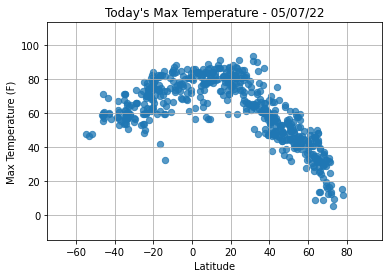

In [12]:
# Build the scatter plot for Latitude vs Temperature
plt.scatter(wdf["Latitude"], wdf["Max Temp"], marker="o", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((wdf["Latitude"].min()-20), (wdf["Latitude"].max()+20))
plt.ylim((wdf["Max Temp"].min()-20), (wdf["Max Temp"].max()+20))

# Add title and labels
plt.title(f"Today's Max Temperature - {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Temp.png")

# Show plot as image
plt.show()

## Latitude vs. Humidity Plot

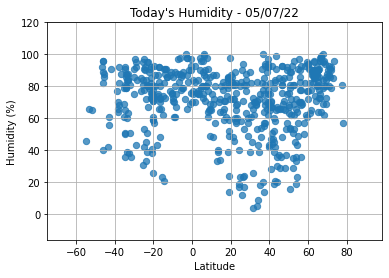

In [13]:
# Build the scatter plot for Latitude vs Humidity
plt.scatter(wdf["Latitude"], wdf["Humidity"], marker="o", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((wdf["Latitude"].min()-20), (wdf["Latitude"].max()+20))
plt.ylim((wdf["Humidity"].min()-20), (wdf["Humidity"].max()+20))

# Add title and labels
plt.title(f"Today's Humidity - {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Humidity.png")

# Show plot as image
plt.show()

## Latitude vs. Cloudiness Plot

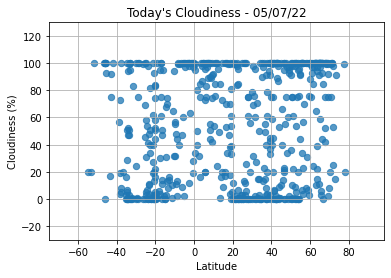

In [14]:

# Build the scatter plot for Latitude vs Cloudiness
plt.scatter(wdf["Latitude"], wdf["Cloudiness"], marker="o", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((wdf["Latitude"].min()-20), (wdf["Latitude"].max()+20))
plt.ylim((wdf["Cloudiness"].min()-30), (wdf["Cloudiness"].max()+30))

# Add title and labels
plt.title(f"Today's Cloudiness - {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Cloudiness.png")

# Show plot as image
plt.show()

## Latitude vs. Wind Speed Plot

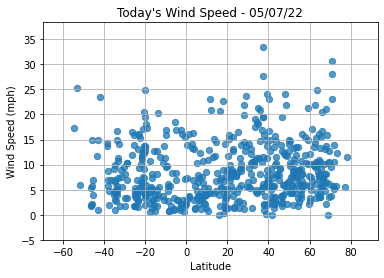

In [15]:
# Build the scatter plot for Latitude vs Wind Speed
plt.scatter(wdf["Latitude"], wdf["Wind Speed"], marker="o", s=40, alpha=0.75)

# Set x and y limits
plt.xlim((wdf["Latitude"].min()-15), (wdf["Latitude"].max()+15))
plt.ylim((wdf["Wind Speed"].min()-5), (wdf["Wind Speed"].max()+5))

# Add title and labels
plt.title(f"Today's Wind Speed - {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Wind Speed.png")

# Show plot as image
plt.show()

## Linear Regression

In [16]:
# Separate by hemisphere
north = wdf.loc[wdf["Latitude"]>0]
south = wdf.loc[wdf["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

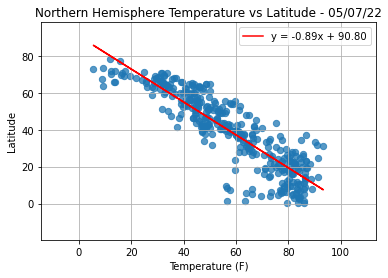

In [17]:
# Northern Hemisphere - Temp vs Lat Scatter
plt.scatter(north["Max Temp"], north["Latitude"], marker="o", s=40, alpha=0.75)
plt.title(f"Northern Hemisphere Temperature vs Latitude - {today}")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

# Set x and y limits
plt.xlim((north["Max Temp"].min()-20), (north["Max Temp"].max()+20))
plt.ylim((north["Latitude"].min()-20), (north["Latitude"].max()+20))

# calculate linear regression
result = st.linregress(north["Max Temp"],north["Latitude"])
formula = result.slope * north["Max Temp"] + result.intercept
plt.plot(north["Max Temp"],formula,color='red',label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}')
plt.legend(loc="best")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Northern Hemisphere Humidity.png")

# Show plot as image
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

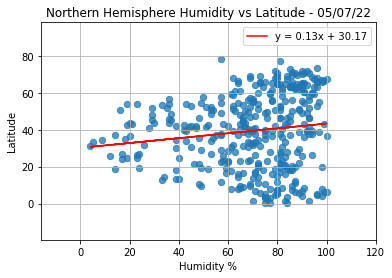

In [18]:
# Northern Hemisphere - Humidity vs Lat Scatter
plt.scatter(north["Humidity"], north["Latitude"], marker="o", s=40, alpha=0.75)
plt.title(f"Northern Hemisphere Humidity vs Latitude - {today}")
plt.xlabel("Humidity %")
plt.ylabel("Latitude")

# Set x and y limits
plt.xlim((north["Humidity"].min()-20), (north["Humidity"].max()+20))
plt.ylim((north["Latitude"].min()-20), (north["Latitude"].max()+20))

# calculate linear regression
result = st.linregress(north["Humidity"],north["Latitude"])
formula = result.slope * north["Humidity"] + result.intercept
plt.plot(north["Humidity"],formula,color='red',label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}')
plt.legend(loc="best")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Northern Hemisphere Temperature.png")

# Show plot as image
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

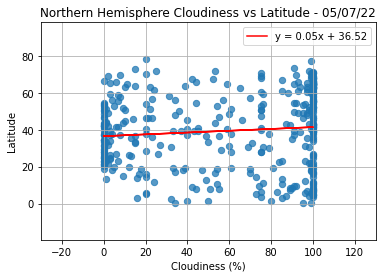

In [19]:
# Northern Hemisphere - Clouds vs Lat Scatter
plt.scatter(north["Cloudiness"], north["Latitude"], marker="o", s=40, alpha=0.75)
plt.title(f"Northern Hemisphere Cloudiness vs Latitude - {today}")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

# Set x and y limits
plt.xlim((north["Cloudiness"].min()-30), (north["Cloudiness"].max()+30))
plt.ylim((north["Latitude"].min()-20), (north["Latitude"].max()+20))

# calculate linear regression
result = st.linregress(north["Cloudiness"],north["Latitude"])
formula = result.slope * north["Cloudiness"] + result.intercept
plt.plot(north["Cloudiness"],formula,color='red',label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}')
plt.legend(loc="best")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Northern Hemisphere Cloudiness.png")

# Show plot as image
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

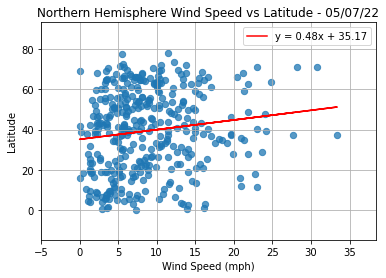

In [20]:
# Northern Hemisphere - Wind Speed vs Lat Scatter
plt.scatter(north["Wind Speed"], north["Latitude"], marker="o", s=40, alpha=0.75)
plt.title(f"Northern Hemisphere Wind Speed vs Latitude - {today}")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

# Set x and y limits
plt.xlim((north["Wind Speed"].min()-5), (north["Wind Speed"].max()+5))
plt.ylim((north["Latitude"].min()-15), (north["Latitude"].max()+15))

# calculate linear regression
result = st.linregress(north["Wind Speed"],north["Latitude"])
formula = result.slope * north["Wind Speed"] + result.intercept
plt.plot(north["Wind Speed"],formula,color='red',label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}')
plt.legend(loc="best")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Northern Hemisphere Wind Speed.png")

# Show plot as image
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

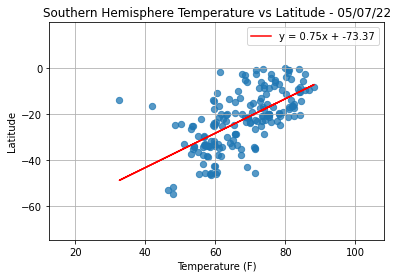

In [21]:
# Southern Hemisphere - Temp vs Lat Scatter
plt.scatter(south["Max Temp"], south["Latitude"], marker="o", s=40, alpha=0.75)
plt.title(f"Southern Hemisphere Temperature vs Latitude - {today}")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")

# Set x and y limits
plt.xlim((south["Max Temp"].min()-20), (south["Max Temp"].max()+20))
plt.ylim((south["Latitude"].min()-20), (south["Latitude"].max()+20))

# calculate linear regression
result = st.linregress(south["Max Temp"], south["Latitude"])
formula = result.slope * south["Max Temp"] + result.intercept
plt.plot(south["Max Temp"],formula,color='red',label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}')
plt.legend(loc="best")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Southern Hemisphere Temp.png")

# Show plot as image
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

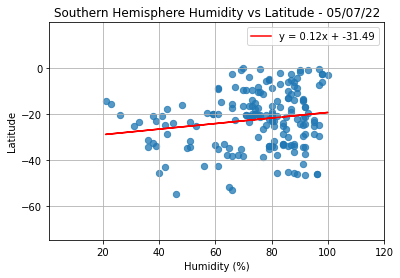

In [22]:
# Southern Hemisphere - Humidity vs Lat Scatter
plt.scatter(south["Humidity"], south["Latitude"], marker="o", s=40, alpha=0.75)
plt.title(f"Southern Hemisphere Humidity vs Latitude - {today}")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")

# Set x and y limits
plt.xlim((south["Humidity"].min()-20), (south["Humidity"].max()+20))
plt.ylim((south["Latitude"].min()-20), (south["Latitude"].max()+20))

# calculate linear regression
result = st.linregress(south["Humidity"],south["Latitude"])
formula = result.slope * south["Humidity"] + result.intercept
plt.plot(south["Humidity"],formula,color='red',label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}')
plt.legend(loc="best")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Southern Hemisphere Humidity.png")

# Show plot as image
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

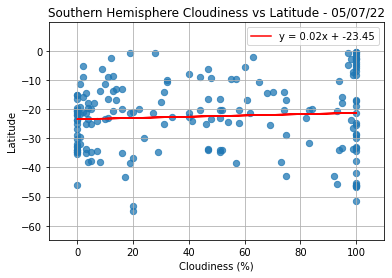

In [23]:
# Southern Hemisphere - Clouds vs Lat Scatter
plt.scatter(south["Cloudiness"], south["Latitude"], marker="o", s=40, alpha=0.75)
plt.title(f"Southern Hemisphere Cloudiness vs Latitude - {today}")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")

# Set x and y limits
plt.xlim((south["Cloudiness"].min()-10), (south["Cloudiness"].max()+10))
plt.ylim((south["Latitude"].min()-10), (south["Latitude"].max()+10))

# calculate linear regression
result = st.linregress(south["Cloudiness"],south["Latitude"])
formula = result.slope * south["Cloudiness"] + result.intercept
plt.plot(south["Cloudiness"],formula,color='red',label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}')
plt.legend(loc="best")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Southern Hemisphere Cloudiness.png")

# Show plot as image
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

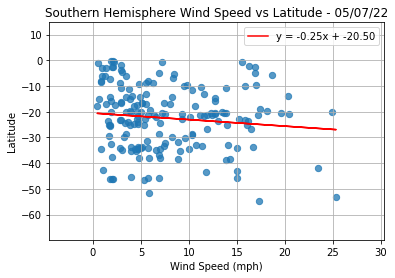

In [24]:
# Southern Hemisphere - Wind Speed vs Lat Scatter
plt.scatter(south["Wind Speed"], south["Latitude"], marker="o", s=40, alpha=0.75)
plt.title(f"Southern Hemisphere Wind Speed vs Latitude - {today}")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")

# Set x and y limits
plt.xlim((south["Wind Speed"].min()-5), (south["Wind Speed"].max()+5))
plt.ylim((south["Latitude"].min()-15), (south["Latitude"].max()+15))

# calculate linear regression
result = st.linregress(south["Wind Speed"],south["Latitude"])
formula = result.slope * south["Wind Speed"] + result.intercept
plt.plot(south["Wind Speed"],formula,color='red',label=f'y = {"{:.2f}".format(result.slope)}x + {"{:.2f}".format(result.intercept)}')
plt.legend(loc="best")

# Add grid 
plt.grid()

# Save plot as Image
plt.savefig("output_data/Southern Hemisphere Wind Speed.png")

# Show plot as image
plt.show()